In [50]:
import numpy as np
import pandas as pd
from PIL import Image
import matplotlib.pyplot as plt
from torch import tensor
import torch
from torch.utils.data import Sampler
from torch.utils.data import Dataset
from torch.utils.data import DataLoader

from torch import nn
from torch import optim
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms, utils
import torchvision
from pytorch_pretrained_vit import ViT
import os

In [51]:
# basic model setupt & load

vit =  ViT('B_16_imagenet1k', pretrained=True)
class VisionTransformer(nn.Module):
    def __init__(self):
        super(VisionTransformer, self).__init__()
        self.vit = vit
        self.linear = nn.Linear(1000, 1)

        
      
    def forward(self, x):
        x = self.vit(x)
        x = torch.sigmoid(self.linear(x))
        return x
model =  VisionTransformer()
model = model.to("cpu") # or cuda

Loaded pretrained weights.


In [52]:
#model .pt load
device = torch.device('cpu')
model.load_state_dict(torch.load("./weights/vit_2023-11-14 17:24:36_model.pt", map_location=device))
model.eval()

VisionTransformer(
  (vit): ViT(
    (patch_embedding): Conv2d(3, 768, kernel_size=(16, 16), stride=(16, 16))
    (positional_embedding): PositionalEmbedding1D()
    (transformer): Transformer(
      (blocks): ModuleList(
        (0): Block(
          (attn): MultiHeadedSelfAttention(
            (proj_q): Linear(in_features=768, out_features=768, bias=True)
            (proj_k): Linear(in_features=768, out_features=768, bias=True)
            (proj_v): Linear(in_features=768, out_features=768, bias=True)
            (drop): Dropout(p=0.1, inplace=False)
          )
          (proj): Linear(in_features=768, out_features=768, bias=True)
          (norm1): LayerNorm((768,), eps=1e-06, elementwise_affine=True)
          (pwff): PositionWiseFeedForward(
            (fc1): Linear(in_features=768, out_features=3072, bias=True)
            (fc2): Linear(in_features=3072, out_features=768, bias=True)
          )
          (norm2): LayerNorm((768,), eps=1e-06, elementwise_affine=True)
         

In [53]:
#image 전처리
transform = transforms.Compose([
    transforms.ToPILImage(),
    transforms.ToTensor(),
    transforms.Resize(size=(384,384)),
    transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225))
])

In [54]:
image_path = "./images/" #plz check your image path
data = os.listdir(image_apth)

WIN_20231109_16_40_28_Pro.jpg
tensor([[0.0007]], grad_fn=<SigmoidBackward0>)
U_3.jpg
tensor([[0.0007]], grad_fn=<SigmoidBackward0>)
KakaoTalk_20231116_143308287.jpg
tensor([[0.0007]], grad_fn=<SigmoidBackward0>)
WIN_20231109_16_37_13_Pro.jpg
tensor([[0.0051]], grad_fn=<SigmoidBackward0>)
KakaoTalk_20231116_143306462.jpg
tensor([[0.0005]], grad_fn=<SigmoidBackward0>)
WIN_20231109_16_37_33_Pro.jpg
tensor([[0.0014]], grad_fn=<SigmoidBackward0>)
KakaoTalk_20231116_143004660.jpg
tensor([[0.0003]], grad_fn=<SigmoidBackward0>)
WIN_20231109_16_37_38_Pro.jpg
tensor([[0.9144]], grad_fn=<SigmoidBackward0>)
KakaoTalk_20231116_142956302.jpg
tensor([[0.9959]], grad_fn=<SigmoidBackward0>)
KakaoTalk_20231116_143245511.jpg
tensor([[0.0005]], grad_fn=<SigmoidBackward0>)
WIN_20231109_16_37_40_Pro.jpg
tensor([[0.7992]], grad_fn=<SigmoidBackward0>)
WIN_20231109_16_39_52_Pro.jpg
tensor([[0.7012]], grad_fn=<SigmoidBackward0>)
WIN_20231109_16_38_54_Pro.jpg
tensor([[0.0033]], grad_fn=<SigmoidBackward0>)
KakaoT

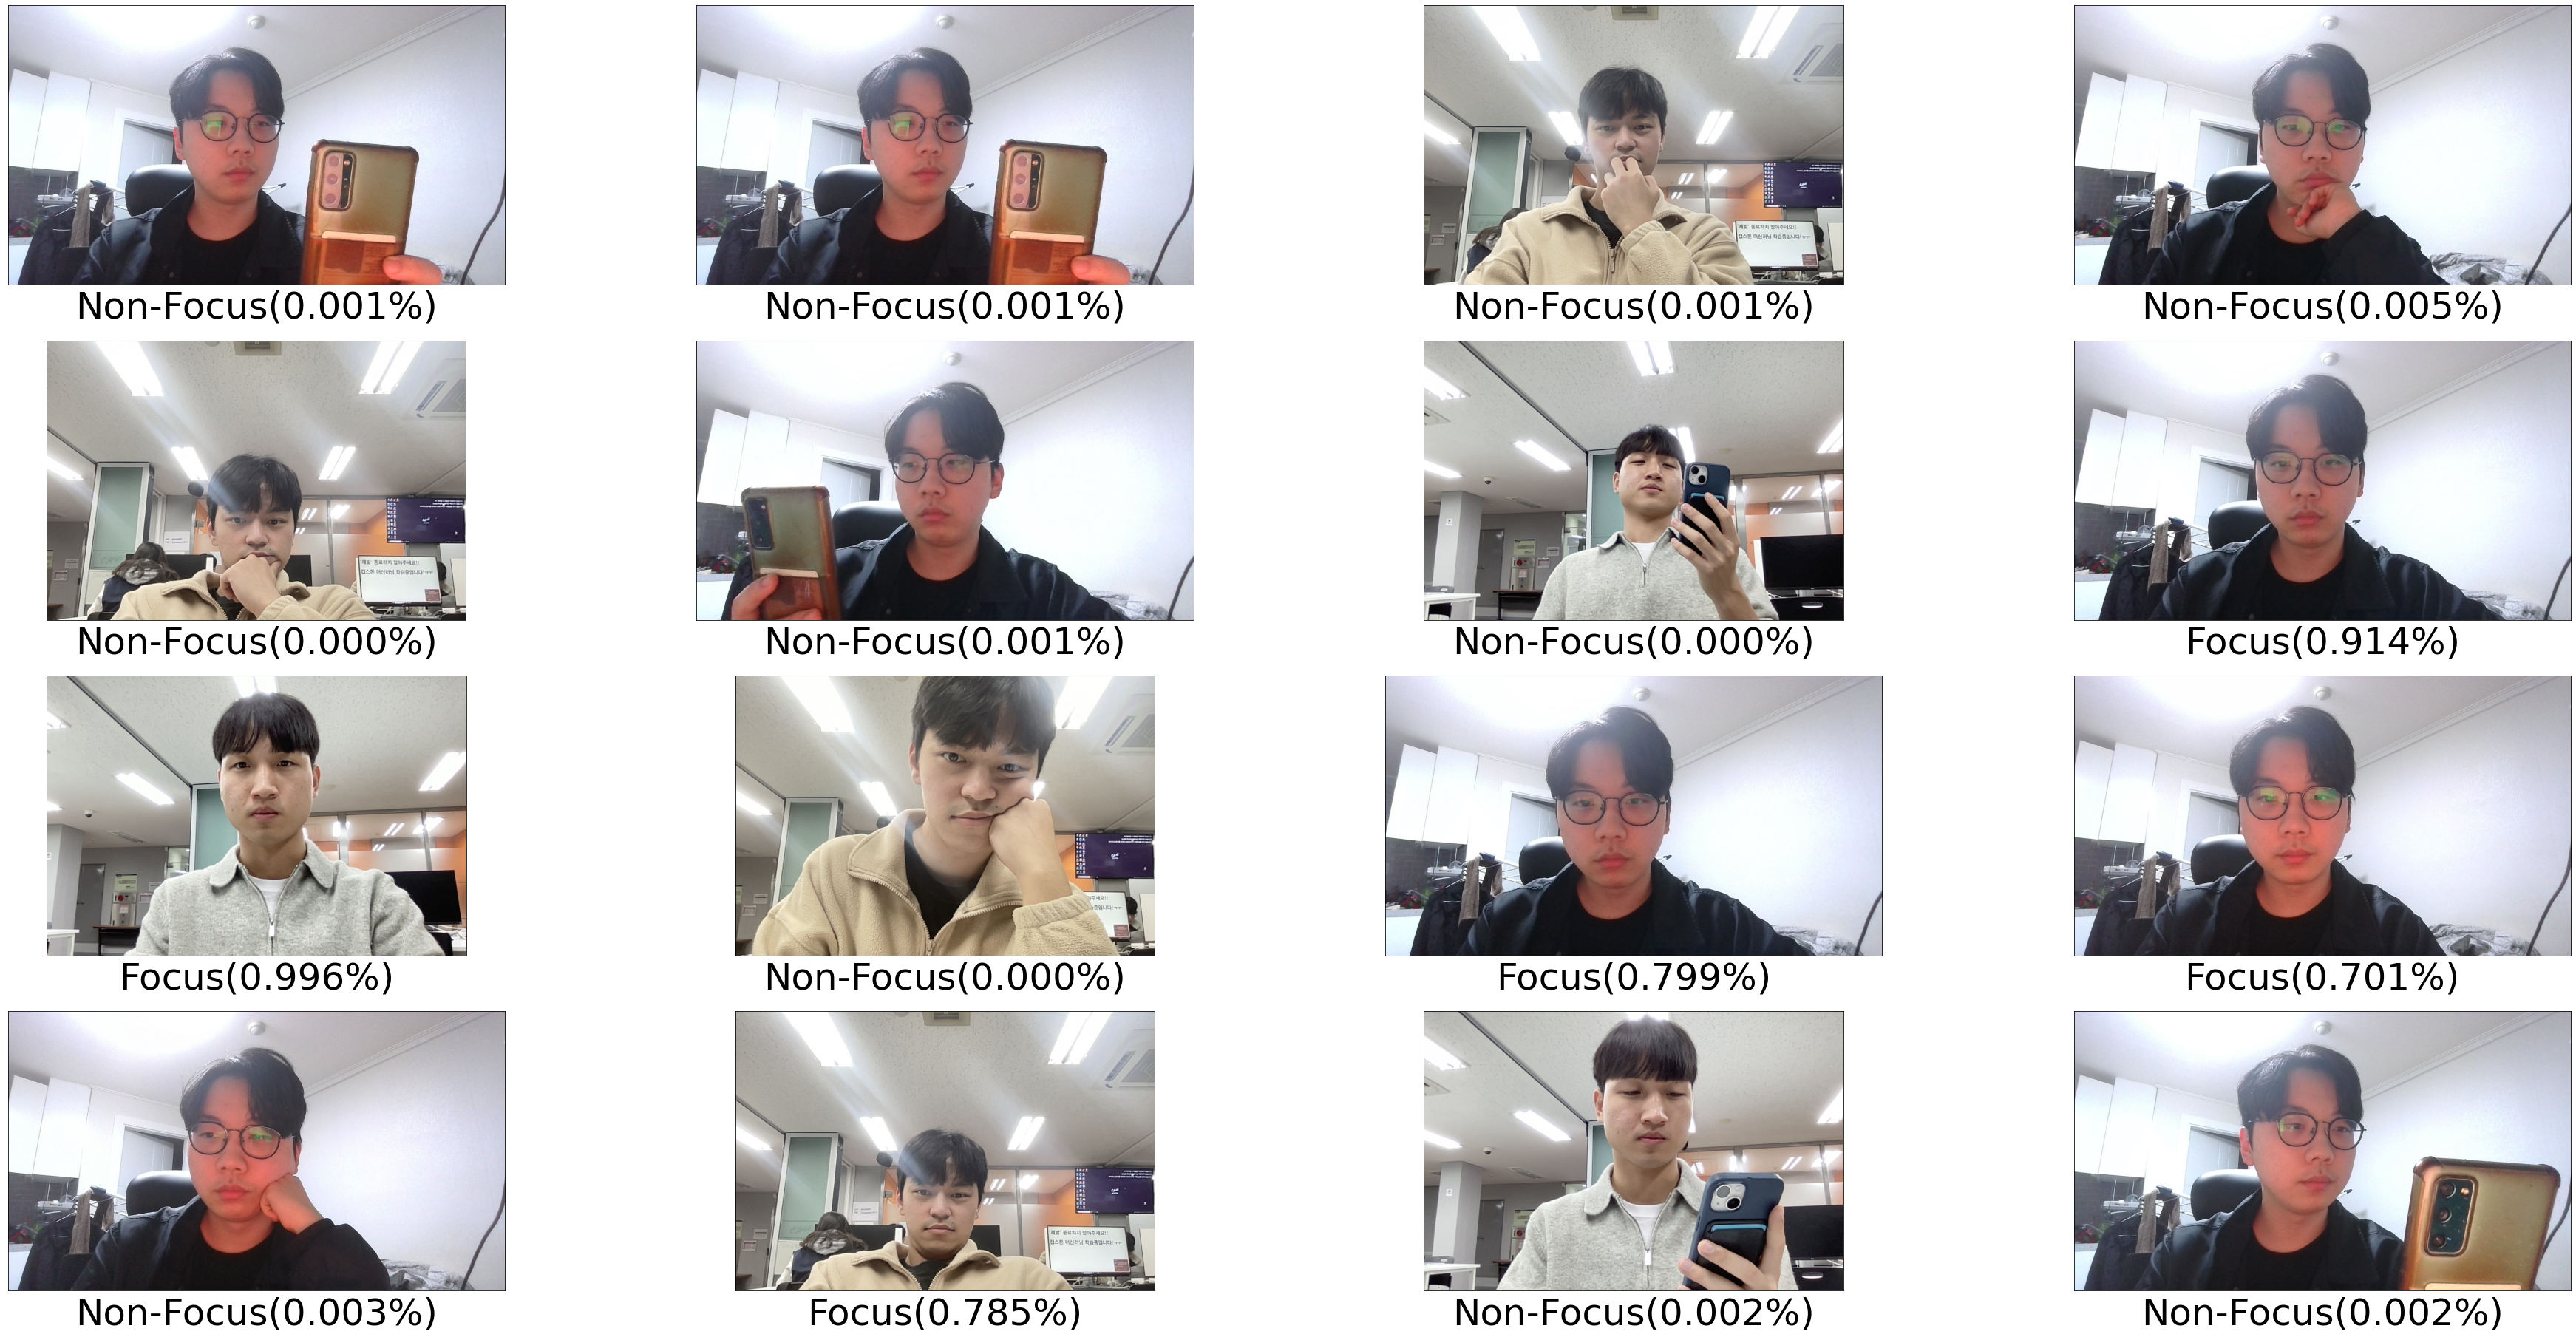

In [97]:
i=1
fig = plt.figure(figsize=(64,32))
rows = 4
cols = 4
plt.rc('axes', labelsize=20)
for path in data[0:16]:
    print("======")
    print(path)
    
    image = torchvision.io.read_image(image_path+path)
    image = transform(image)
    check_img = cv2.imread(image_path+path)
    
    result = model(image.unsqueeze(0))
    
    
    print(result)
    if result > 0.5:
        title = "Focus(%0.3f%%)" %(float(result[0][0]))
    else:
        title = "Non-Focus(%0.3f%%)" %(float(result[0][0]))
    
    ax1 = fig.add_subplot(rows, cols, i)
    ax1.imshow(cv2.cvtColor(check_img, cv2.COLOR_BGR2RGB))
    ax1.set_xlabel(title, fontsize=50)
    ax1.set_xticks([]), ax1.set_yticks([])
    i = i + 1

    
plt.show()